https://www.kaggle.com/datasets/prateekmaj21/disney-movies

All Disney movies with their release dates, genre, rating, total gross and inflation adjusted gross(2016).
Disney has produced many movies, this data has all Disney movies till 2016.

### Importing libraries

In [2]:
import pandas as pd
import locale
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import sqlite3
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [28]:
df = pd.read_csv(r"disney_movies.csv")
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [5]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Converting 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
# There are some movies without gross 
df[df.total_gross == 0]
lines = [20,27,29,355]
df.drop(lines, inplace = True)

In [8]:
#Some genres and mpaa_ratings are missing
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       15
mpaa_rating                 52
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [9]:
#Converting numbers to numbers separated with '.' to be more legible - but converts to string
# locale.setlocale(locale.LC_ALL, 'de_DE.utf-8')
# df["total_gross"] = [locale.format("%d", v, 1) for v in df.iloc[:,4]]
# df["inflation_adjusted_gross"] = [locale.format("%d", v, 1) for v in df.iloc[:,5]]


In [10]:
#Replacing null values in 'genre' and 'mpaa_rating'
df[df.genre.isnull()]
dict_genres = {"Comedy":[22,24,26,122,128,156],"Adventure":[23,25],"Musical":[121],"Drama":[146,251,304],"Romantic Comedy":[155],"Thriller/Suspense":[168],"Action":[350]}

for k,v in dict_genres.items(): df["genre"][v] = k
df.head(24)


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [11]:
df.loc[df["mpaa_rating"].isna(),"mpaa_rating"] = "Not Rated"

# df.isnull().sum()
df.head(24)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,Not Rated,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,Not Rated,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,Not Rated,25381407,310094574


In [12]:
df.genre.unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

### SQL

In [13]:
dis = df
e = pd.read_sql_query
conn = sqlite3.connect('disney_movies.db')
dis.to_sql('disney', conn, if_exists='replace', index=False)

575

### Data Analysis

______________
Distributions
______________

In [14]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

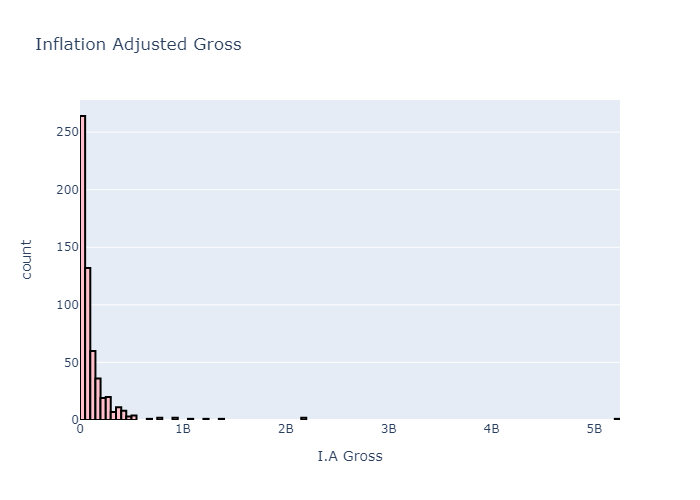

In [27]:
fig =  px.histogram(
    data_frame=df,
    x='inflation_adjusted_gross',
    nbins=150,
    labels = {"inflation_adjusted_gross": "I.A Gross"},
    # marginal="box",
    title = "Inflation Adjusted Gross",
).update_traces(marker=dict(color='pink'))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"


fig.show("png")

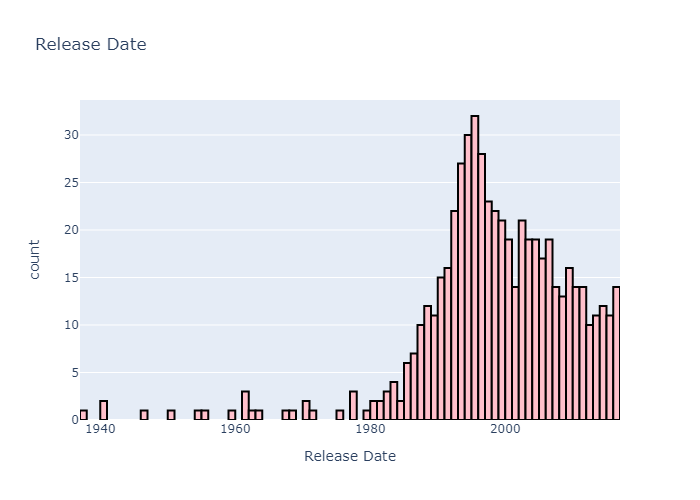

In [26]:
fig =  px.histogram(
    data_frame=df,
    x='release_date',
    nbins=150,
    labels = {"release_date": "Release Date"},
    # marginal="box",
    title = "Release Date",
).update_traces(marker=dict(color='pink'))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"


fig.show("png")

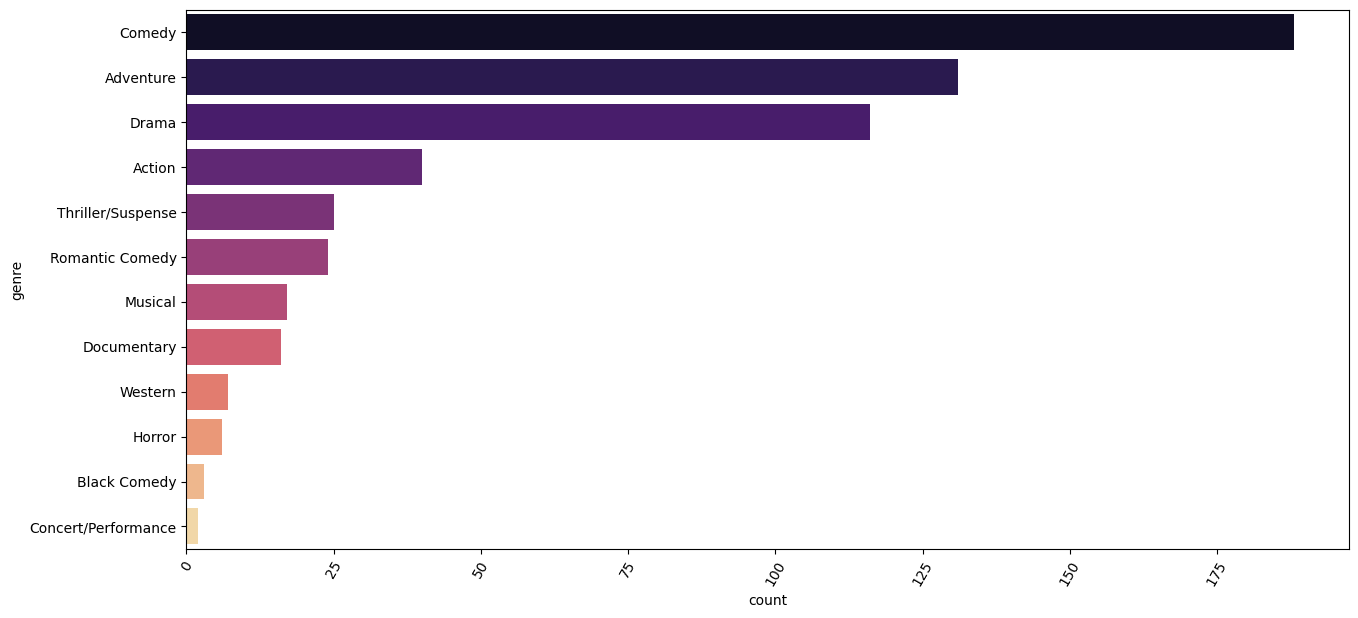

In [17]:
# df['genre'].value_counts().head(10).plot(kind='barh',color='pink')
plt.figure(figsize=(15,7))
sns.countplot(y=df['genre'], data=df, order=df.genre.value_counts().index, palette='magma')
plt.xticks(rotation=60);

_________
Most Profitable Movies
_______


In [18]:
df_1 = df.loc[df["inflation_adjusted_gross"]>= 650000000]

df_1.sort_values(["inflation_adjusted_gross"], ascending = False).reset_index()


,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
4,6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
5,3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
6,564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
7,4,Cinderella,1950-02-15,Drama,G,85000000,920608730
8,13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
9,179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [19]:
largest_gross = e('''
                  
                         SELECT inflation_adjusted_gross, movie_title
                         FROM disney
                         ORDER BY inflation_adjusted_gross DESC
                         LIMIT 10
                         
                         ''', conn)

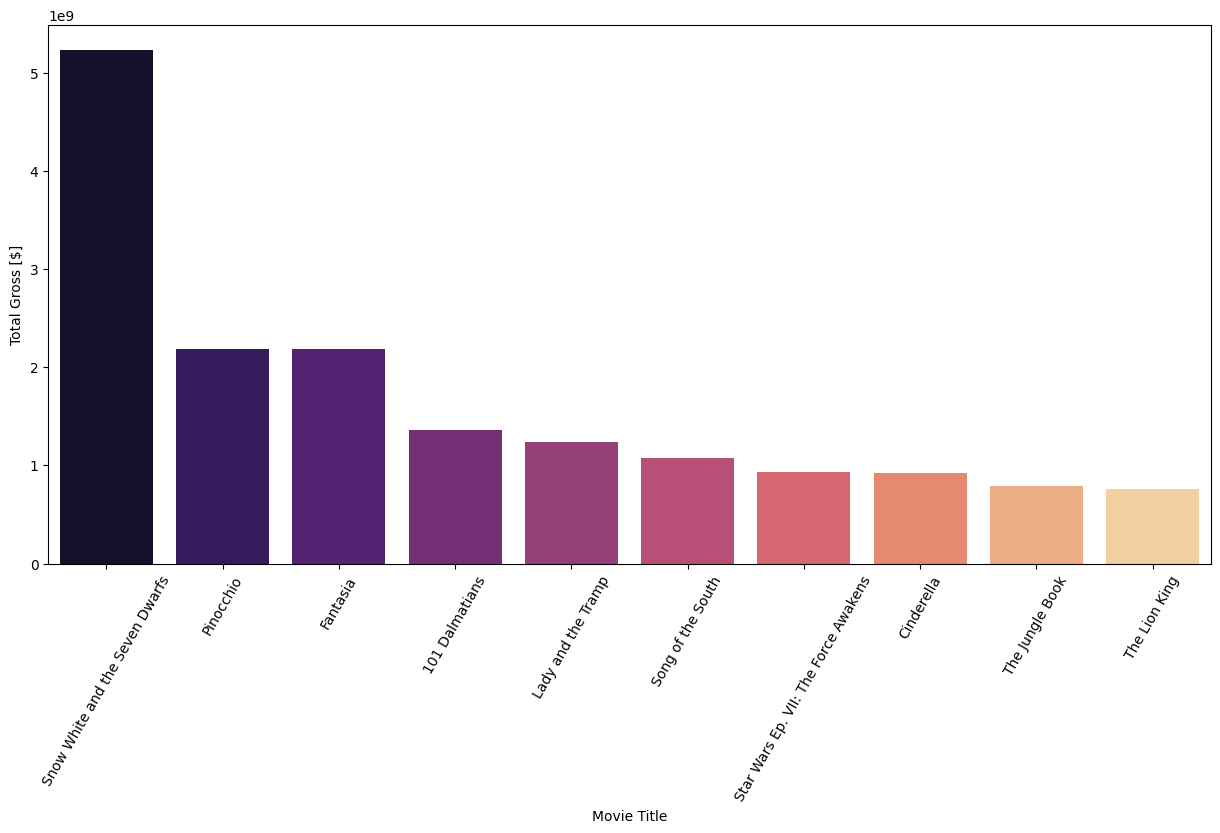

In [20]:
plt.figure(figsize=(15,7))
chart =sns.barplot(x='movie_title', y='inflation_adjusted_gross', data=largest_gross, palette='magma')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross [$]')
plt.xticks(rotation=60)
plt.show()

_________
Most Profitable Genres
__________

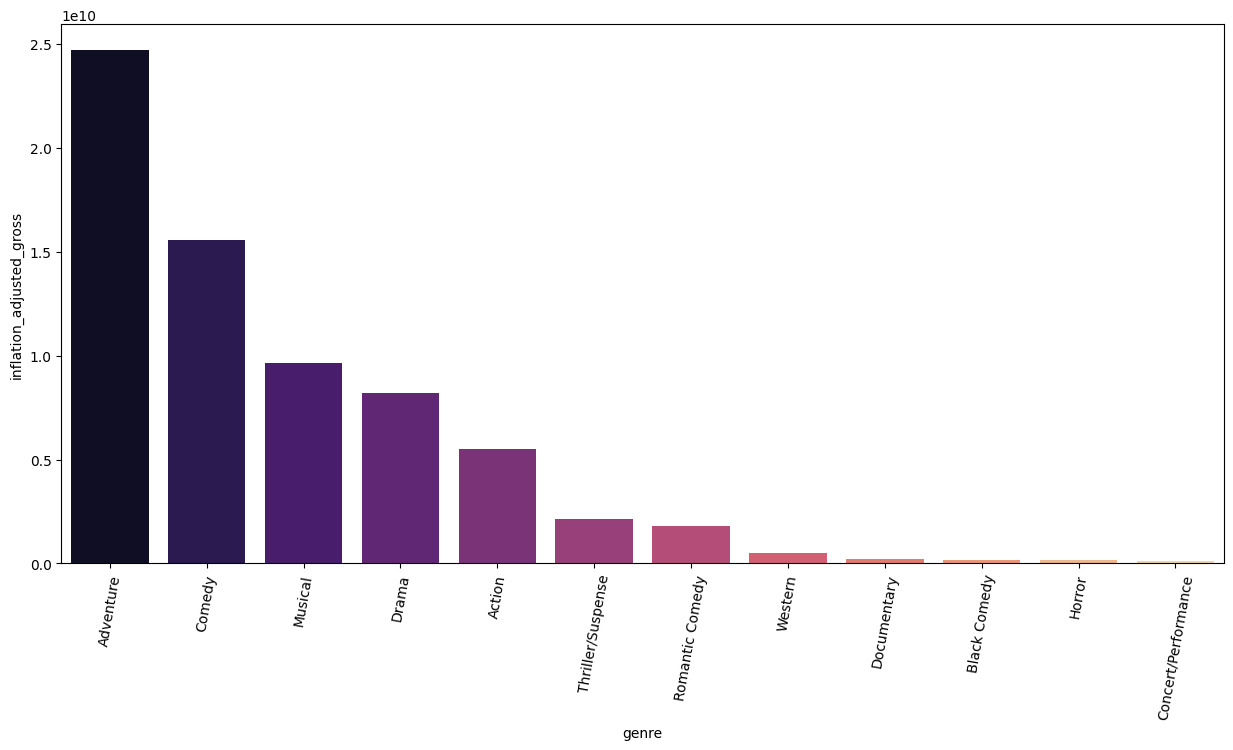

In [21]:
data = pd.DataFrame(df.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False))

plt.figure(figsize=(15,7))
sns.barplot(x=data.index, y= data['inflation_adjusted_gross'], palette='magma')
plt.xticks(rotation=80);


# df.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False).plot(kind='bar')

In [22]:
data_rank = e('''
                        SELECT * FROM(
                            SELECT  genre, 
                            movie_title, 
                            inflation_adjusted_gross,
                            ROW_NUMBER() OVER (PARTITION BY genre ORDER BY inflation_adjusted_gross DESC) AS position
                            FROM disney) ranks
                        WHERE position <=3
                            ''', conn)

data_rank = data_rank.pivot_table(columns = 'genre',index = 'position',values = 'inflation_adjusted_gross', fill_value="-")

pd.options.display.float_format = '{:,.2f}'.format
data_rank

genre,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
position,,,,,,,,,,,,
1,"660,081,224.00","2,188,229,052.00","76,758,193.00","1,362,870,985.00","76,646,993.00","35,981,010.00","1,236,035,515.00","48,546,161.00","5,228,953,251.00","356,389,765.00","485,424,724.00","115,781,734.00"
2,"459,005,868.00","1,078,510,579.00","51,579,764.00","441,969,178.00","38,174,685.00","30,675,725.00","920,608,730.00","29,712,825.00","2,187,090,808.00","184,288,829.00","330,754,439.00","92,597,388.00"
3,"424,084,233.00","936,662,225.00","28,392,518.00","353,334,607.00",-,"23,803,108.00","202,531,517.00","19,452,402.00","789,612,346.00","157,082,900.00","178,831,137.00","91,340,921.00"


_________
Most Profitable by Rating
____

In [23]:
largest_rating = e('''
                  
                         SELECT mpaa_rating,
                            SUM(inflation_adjusted_gross) as totalgross
                         FROM disney
                         GROUP BY 1
                         ORDER BY totalgross DESC
                         
                         ''', conn)

In [24]:
largest_rating

,mpaa_rating,totalgross
0,G,25048445571
1,PG,18988248082
2,PG-13,14927544680
3,R,5641192166
4,Not Rated,4158070498


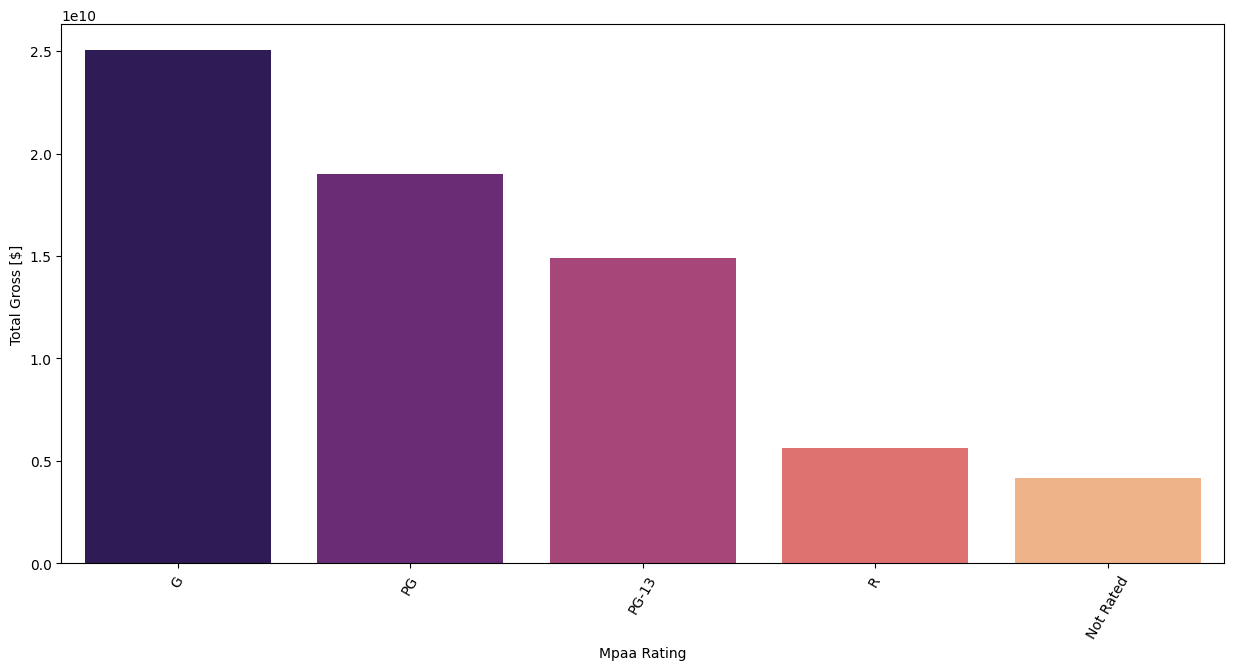

In [25]:
plt.figure(figsize=(15,7))
chart =sns.barplot(x='mpaa_rating', y='totalgross', data=largest_rating, palette='magma')
plt.xlabel('Mpaa Rating')
plt.ylabel('Total Gross [$]')
plt.xticks(rotation=60)
plt.show()